# Plot ApRES melt rates accross the channel profile

In [37]:
import fiona
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import Point
import numpy as np
import os
import sys
import glob
import matplotlib.pyplot as plt
from scipy import interpolate

from shapely.geometry import LineString


import rasterio as rio
import rasterio.mask




In [46]:
df = pd.read_csv('/Users/home/whitefar/CODE/apres/KIS2_ApresResults.csv')
df = df.sort_values('x')
points = [Point(xy) for xy in zip(df.x,df.y) ]
gdf = gpd.GeoDataFrame(df,geometry=points,crs=3031)

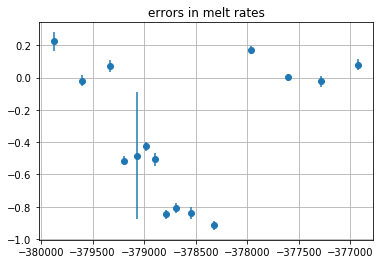

<Figure size 720x504 with 0 Axes>

In [53]:
plt.errorbar(gdf.x,gdf.melt_rate,yerr=gdf.melt_rate_error,xerr=0,marker='o',linestyle="None")
plt.grid()
plt.title('errors in melt rates')
plt.figure(figsize=(10,7))
plt.show()

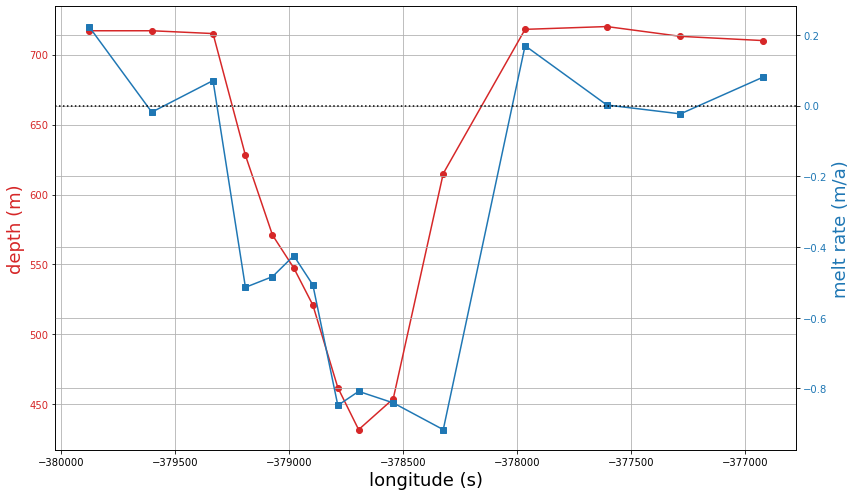

In [54]:
fig, ax1 = plt.subplots(figsize=(12,7))
color = 'tab:red'
ax1.set_xlabel('longitude (s)',fontsize=18)
ax1.set_ylabel('depth (m)', color=color,fontsize=18)
ax1.plot(gdf.x,gdf.depth, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('melt rate (m/a)', color=color,fontsize=18)  # we already handled the x-label with ax1
ax2.plot(gdf.x,gdf.melt_rate,marker='s', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid()
ax2.axhline(y=0,color='k',linestyle=':')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


# plot where it is on map

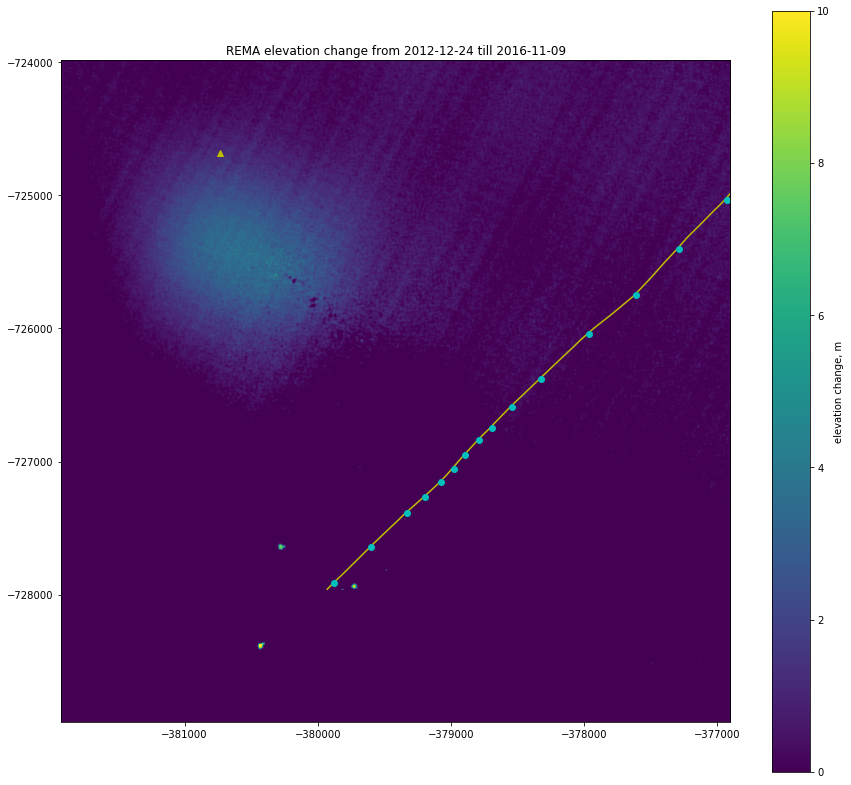

In [49]:

nid1 = 159202
nid2 = 131226
kis2 = [-380737.537026,-724683.311299]
line_name = 'lineAPREScross'
v=[0,10]
df_R = gpd.read_file('/Users/home/whitefar/DATA/REMOTE_SENSING/REMA_2m_strips/REMA_Strip_Index_Rel1.shp')

path = f"/Volumes/arc_02/whitefar/DATA/REMOTE_SENSING/REMA_STRIPES/DIFFERENCES/REMA_{nid1}-{nid2}_diff.tif"
image = rio.open(path)

extent = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
gdf_R = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                    +line_name+".shp")
f = df_R.loc[nid1].acquisitio
t =df_R.loc[nid2].acquisitio
xmin,xmax = [gdf_R.geometry.x.to_numpy().min(),gdf_R.geometry.x.to_numpy().max()]
ymin,ymax = [gdf_R.geometry.y.to_numpy().min(),gdf_R.geometry.y.to_numpy().max()]
plt.figure(figsize=(15,14))
plt.imshow(image.read(1),extent=extent, vmin=v[0],vmax=v[1])
plt.xlim([xmin-2000, xmax])
plt.ylim([ymin-1000,ymax+1000])
cb = plt.colorbar()
plt.plot(gdf_R.geometry.x,gdf_R.geometry.y,'y')
plt.plot(gdf.geometry.x,gdf.geometry.y,'oc')
plt.plot(kis2[0],kis2[1],'y^')
plt.title(f'REMA elevation change from {f} till {t}')
cb.set_label('elevation change, m')